In [2]:

import pandas as pd

# Load dataset
df = pd.read_csv("car_prices.csv")

# Display first 5 rows
df.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


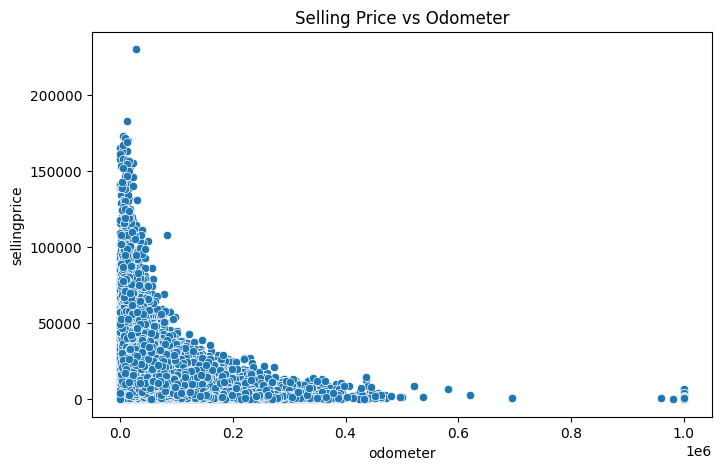

In [4]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='odometer', y='sellingprice')
plt.title("Selling Price vs Odometer")
plt.show()


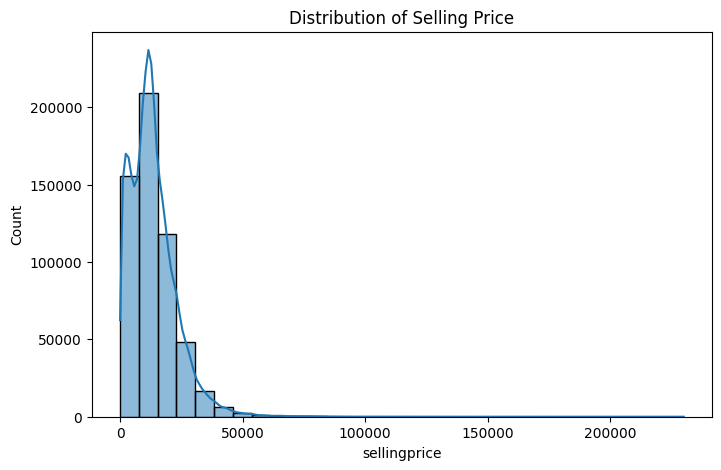

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sellingprice'], bins=30, kde=True)
plt.title("Distribution of Selling Price")
plt.show()


In [6]:
# Check for missing values
df.isnull().sum()

# Fill missing values (example: fill numeric with median)
df_filled = df.fillna(df.median(numeric_only=True))


In [7]:
Q1 = df['sellingprice'].quantile(0.25)
Q3 = df['sellingprice'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = df[(df['sellingprice'] < Q1 - 1.5 * IQR) | (df['sellingprice'] > Q3 + 1.5 * IQR)]

# Remove outliers
df_no_outliers = df[~df.index.isin(outliers.index)]


In [8]:
# Reduce dataset size by 50%
df_sampled = df.sample(frac=0.5, random_state=1)


In [9]:
df_reduced = df_sampled.drop(columns=['vin', 'saledate', 'seller'])


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[['mmr', 'odometer', 'sellingprice']] = scaler.fit_transform(df_scaled[['mmr', 'odometer', 'sellingprice']])


In [11]:
df_scaled['odometer_bin'] = pd.cut(df['odometer'], bins=3, labels=["Low", "Medium", "High"])


In [12]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [13]:
print("Min:", df['sellingprice'].min())
print("Max:", df['sellingprice'].max())
print("Mean:", df['sellingprice'].mean())
print("Median:", df['sellingprice'].median())
print("Mode:", df['sellingprice'].mode()[0])


Min: 1.0
Max: 230000.0
Mean: 13611.358810003132
Median: 12100.0
Mode: 11000.0


In [14]:
print("Range:", df['sellingprice'].max() - df['sellingprice'].min())
print("Q1:", df['sellingprice'].quantile(0.25))
print("Q3:", df['sellingprice'].quantile(0.75))
print("IQR:", Q3 - Q1)
print("Variance:", df['sellingprice'].var())
print("Std Deviation:", df['sellingprice'].std())


Range: 229999.0
Q1: 6900.0
Q3: 18200.0
IQR: 11300.0
Variance: 95052781.9909601
Std Deviation: 9749.501627824886


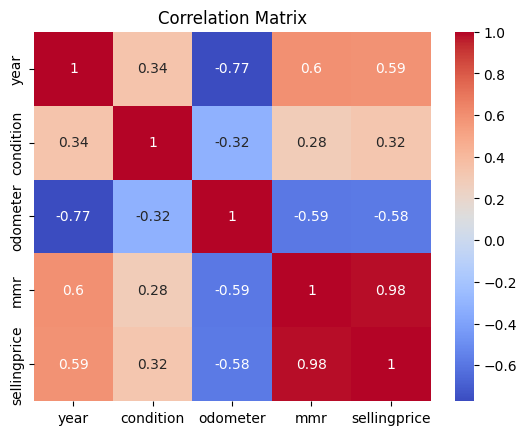

In [15]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
